# **Data Analysis Project: Air Quality from Nongzhanguan**
### - **Name**: Naoby Prawira
### - **Email Address**: [naobyprawira8@gmail.com](mailto:naobyprawira8@gmail.com)
### - **Dicoding ID**: [naobyprawira](https://www.dicoding.com/users/naobyprawira)


## **Define Questions**

1. How does air quality vary throughout the years in the Nongzhanguan station?
2. What are the correlations between PM10 levels and other environmental factors in the Nongzhanguan station dataset?

## **Import Library**

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### Gathering Data

In [116]:
## Data below is gathered provided by Dicoding Indonesia and downloaded via GDrive
df = pd.read_csv('data/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df

,"g""No""",year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,35061,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,35062,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,35063,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


### Assessing Data

In [117]:
## check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   g"No"    35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


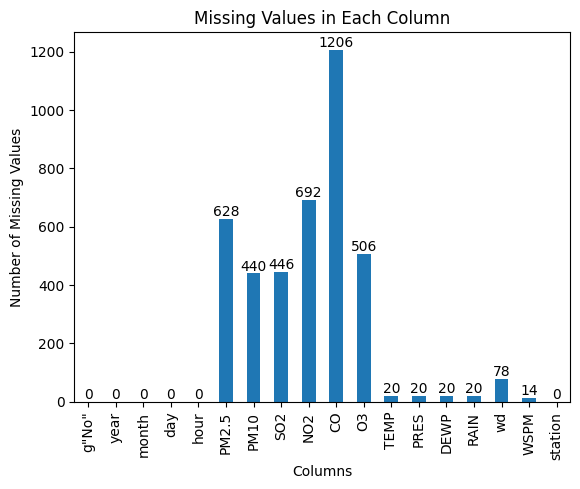

In [118]:
## checking for missing values
missing_values = df.isnull().sum()
missing_values.plot(kind='bar')

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Add notation for each bar
for i, value in enumerate(missing_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [119]:
## check for duplicated data
print("Total duplicated data: ", df.duplicated().sum())
df.describe()

Total duplicated data:  0


,"g""No""",year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


### Cleaning Data

In [120]:
## drop columns with uninformatical or missing values
df.drop(['g"No"','station'], axis=1, inplace=True)
df.dropna(inplace=True)

In [121]:
df_encoded = pd.get_dummies(df, columns=['wd'], dtype=int)
df= df_encoded

## **Exploratory Data Analysis**

**Gaining insights from the summary statistics of the dataset**


In [122]:
df.describe(include='all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,wd_NNW,wd_NW,wd_S,wd_SE,wd_SSE,wd_SSW,wd_SW,wd_W,wd_WNW,wd_WSW
count,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,...,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000
mean,2014.681373,6.461799,15.685420,11.519176,84.720783,109.175929,18.560198,58.213457,1327.784381,58.614905,...,0.048076,0.070665,0.044724,0.053905,0.040315,0.055868,0.070544,0.028417,0.037930,0.050069
std,1.170139,3.439149,8.823626,6.948669,85.633679,95.022778,24.109360,36.379472,1248.356734,58.561702,...,0.213931,0.256268,0.206701,0.225833,0.196701,0.229669,0.256066,0.166163,0.191029,0.218092
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,3.000000,8.000000,6.000000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,6.000000,16.000000,11.000000,59.000000,86.000000,9.000000,51.000000,900.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,9.000000,23.000000,18.000000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


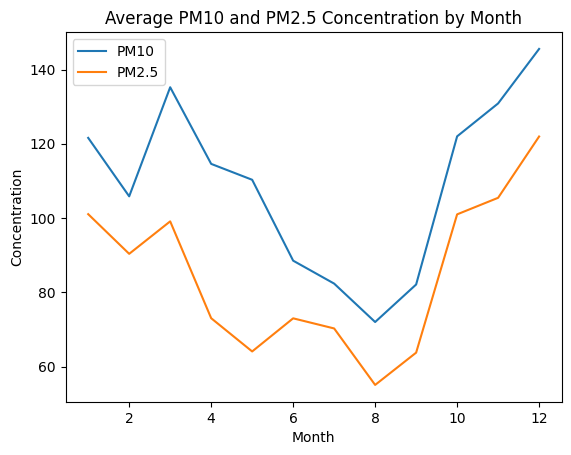

In [133]:
df.groupby('month')[['PM10', 'PM2.5']].mean().plot(kind='line')

plt.xlabel('Month')
plt.ylabel('Concentration')
plt.title('Average PM10 and PM2.5 Concentration by Month')
plt.show()

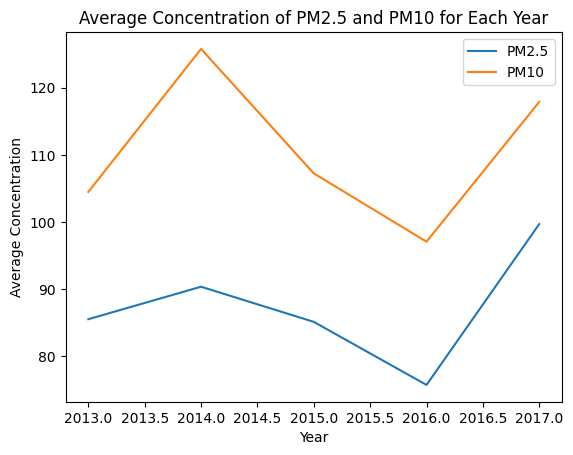

In [132]:
# Calculate the average concentration for each year
average_concentration = df.groupby('year')[['PM2.5', 'PM10']].mean()

# Plot the line chart
average_concentration.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Concentration')
plt.title('Average Concentration of PM2.5 and PM10 for Each Year')
plt.legend(['PM2.5', 'PM10'])
plt.show()


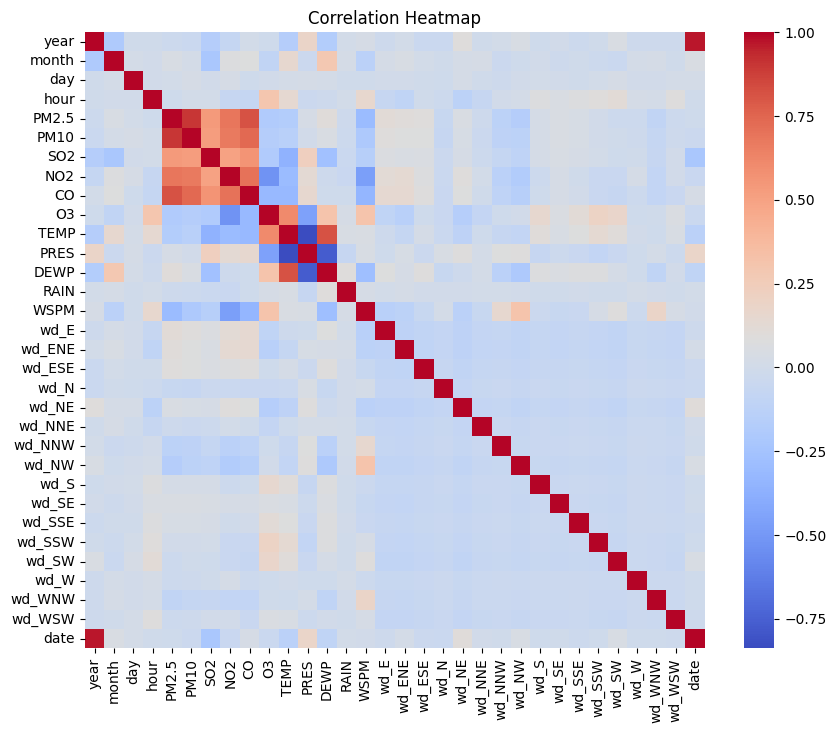

In [124]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Visualization & Explanatory Analysis**

### Question 1 : 

How is the air quality at Aotizhongxin from year to year? Has there been any improvement?

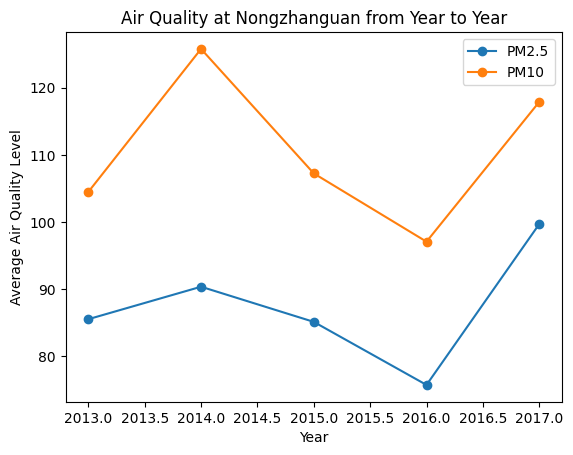

In [126]:
import matplotlib.pyplot as plt

# Group the data by year and calculate the average PM2.5 and PM10 levels
yearly_avg = df.groupby('year')[['PM2.5', 'PM10']].mean()

# Plot the average PM2.5 and PM10 levels over the years
yearly_avg.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Air Quality Level')
plt.title('Air Quality at Nongzhanguan from Year to Year')
plt.legend(['PM2.5', 'PM10'])
plt.show()


Both PM2.5 and PM10 concentration levels in Nongzhanguan are in fluctuative rate. In 2016, graph shows that the air quality level is increasing (low concentration), but the numbers are changing overtime in a random way (tend to decreasing) based on environmental factors.

### Question 2 :

What weather variable correlate the most with PM10 levels, and how does the relationship between PM10 and the most correlated variable?

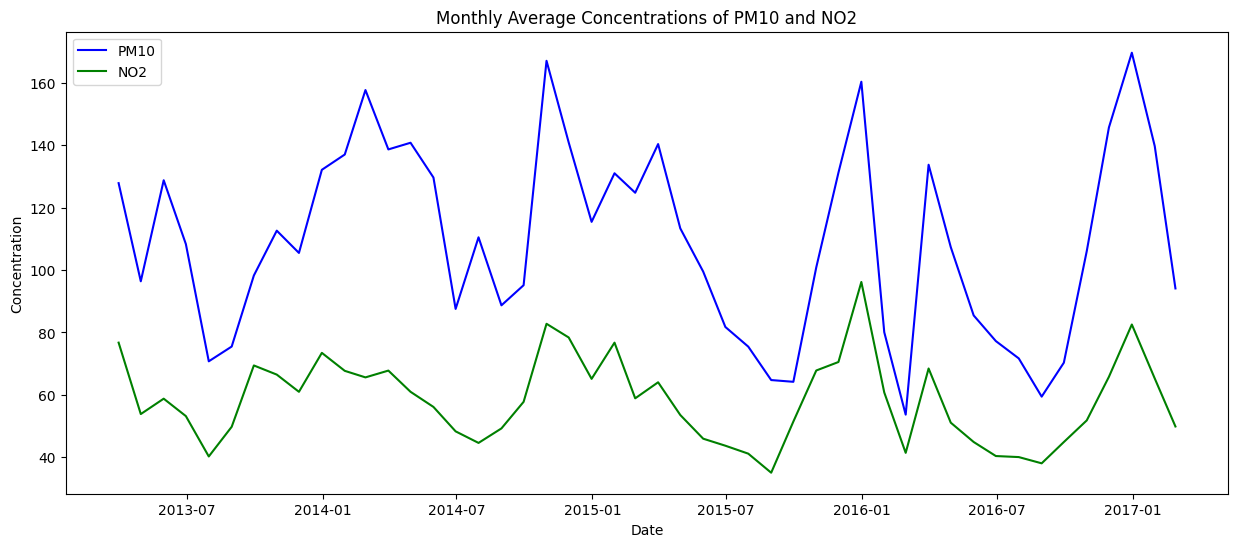

In [123]:

# Convert 'year', 'month', 'day', 'hour' columns to datetime for the x-axis
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
data_time_series = df[['date', 'PM10', 'NO2']].set_index('date').resample('M').mean()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(data_time_series.index, data_time_series['PM10'], label='PM10', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')

# Formatting
plt.title('Monthly Average Concentrations of PM10 and NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

The highest correlated variable is NO2, both PM10 and NO2 have common sources, such as vehicle emissions, industrial processes, and combustion (e.g., fossil fuels, biomass burning). Therefore, there is a strong positive correlation between these two variables.

## **Conclusion**

- The air quality at Aotizhongxin has shown fluctuations from year to year. Both PM2.5 and PM10 concentration levels exhibit a varying trend. In 2016, the air quality graph indicates an overall increase with lower concentration levels. However, over time, these levels exhibit a random pattern, tending to decrease based on environmental factors.
- The provided analysis indicates that NO2 is the weather variable that correlates the most with PM10 levels. This strong positive correlation is supported by the shared sources of both pollutants, including vehicle emissions, industrial processes, and combustion of various fuels such as fossil fuels and biomass.